<a href="https://colab.research.google.com/github/laisvilioni/Machine-Learning/blob/main/mushroom_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Mushroom Dataset Classification (using Decision Tree).**

In [ ]:
!pip freeze

In [1]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv('/content/drive/My Drive/Data Science and Engineering/mushroom.csv')

In [5]:
df.head

<bound method NDFrame.head of      cap-shape cap-surface cap-color  ... population habitat class
0            x           s         n  ...          s       u     p
1            x           s         y  ...          n       g     e
2            b           s         w  ...          n       m     e
3            x           y         w  ...          s       u     p
4            x           s         g  ...          a       g     e
...        ...         ...       ...  ...        ...     ...   ...
8119         k           s         n  ...          c       l     e
8120         x           s         n  ...          v       l     e
8121         f           s         n  ...          c       l     e
8122         k           y         n  ...          v       l     p
8123         x           s         n  ...          c       l     e

[8124 rows x 23 columns]>

In [6]:
print(df)

     cap-shape cap-surface cap-color  ... population habitat class
0            x           s         n  ...          s       u     p
1            x           s         y  ...          n       g     e
2            b           s         w  ...          n       m     e
3            x           y         w  ...          s       u     p
4            x           s         g  ...          a       g     e
...        ...         ...       ...  ...        ...     ...   ...
8119         k           s         n  ...          c       l     e
8120         x           s         n  ...          v       l     e
8121         f           s         n  ...          c       l     e
8122         k           y         n  ...          v       l     p
8123         x           s         n  ...          c       l     e

[8124 rows x 23 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [8]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [9]:
df['class'] = df['class'].map({'e' : 0, 'p' : 1})
df.drop('veil-type', axis = 1, inplace = True)
df.info() #Deletei coluna veil-type e transformei a class em binária.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [10]:
df.dropna(inplace = True)

In [11]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g,0


In [12]:
df.value_counts()

cap-shape  cap-surface  cap-color  bruises%3F  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  ring-type  spore-print-color  population  habitat  class
x          y            y          t           l     f                c             b          w           e            r           s                         y                         w                       w                       w           o            p          n                  y           p        0        1
f          s            y          t           l     f                w             n          n           t            b           s                         s                         w                       w                       w           o            p          n                  v           d        0        1
           y            e          t           n

In [ ]:
pip install -U imbalanced-learn

In [13]:
df = pd.get_dummies(df) #Transformar categóricos em numéricos.
df.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape_b,0,0,1,0,0
cap-shape_c,0,0,0,0,0
cap-shape_f,0,0,0,0,0
cap-shape_k,0,0,0,0,0
...,...,...,...,...,...
habitat_g,0,1,0,0,1
habitat_l,0,0,0,0,0
habitat_m,0,0,1,0,0
habitat_p,0,0,0,0,0


In [14]:
df.value_counts()

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_w  cap-color_y  bruises%3F_f  bruises%3F_t  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  gill-attachment_a  gill-attachment_f  gill-spacing_c  gill-spacing_w  gill-size_b  gill-size_n  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stalk-shape_e  stalk-shape_t  stalk-root_b  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_f  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-above-ring_y  stalk-surface-below-ring_f  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_b  stalk-color-above-ring_c  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_p  stalk

In [15]:
df["class"].unique() #p = 1 e e = 0.

array([1, 0])

In [16]:
y = df["class"].values 
x = df.drop(["class"], axis=1).values   
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42,test_size= 0.2)

In [17]:
#Classificação
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Teste de acuracia sem balancear: {}%".format(round(dt.score(x_test, y_test) * 100, 2)))

Teste de acuracia sem balancear: 100.0%


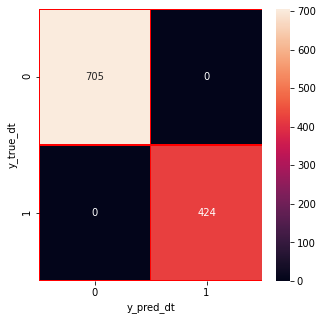

In [18]:
#Resultado da classificação antes de balancear com a matriz de confusão.  
y_pred_dt = dt.predict(x_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()

In [20]:
#Relatório da classificação.
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [21]:
#Matriz de confusão.
print(pd.crosstab(y_test, y_pred_dt, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito    0    1   All
Real                   
0        705    0   705
1          0  424   424
All      705  424  1129
